In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os 
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
os.chdir('/Users/adiaruzcategui/Desktop/ga-labs/Classic_IR_Bodystyle/bodystyles')
if os.path.isdir('train/coupe') is False:
    os.makedirs('train/coupe')
    os.makedirs('train/truck')
    os.makedirs('train/vert')
    os.makedirs('train/motorcycle')
    os.makedirs('train/sport')
    os.makedirs('valid/coupe')
    os.makedirs('valid/truck')
    os.makedirs('valid/vert')
    os.makedirs('valid/motorcycle')
    os.makedirs('valid/sport')
    os.makedirs('test/coupe')
    os.makedirs('test/truck')
    os.makedirs('test/vert')
    os.makedirs('test/motorcycle')
    os.makedirs('test/sport')
    
    for i in random.sample(glob.glob('coupe*'), 35):
        shutil.move(i, 'train/coupe')
    for i in random.sample(glob.glob('truck*'), 35):
        shutil.move(i, 'train/truck')
    for i in random.sample(glob.glob('vert*'), 35):
        shutil.move(i, 'train/vert')
    for i in random.sample(glob.glob('motorcycle*'), 35):
        shutil.move(i, 'train/motorcycle')
    for i in random.sample(glob.glob('sport*'), 35):
        shutil.move(i, 'train/sport')
    for i in random.sample(glob.glob('coupe*'), 10):
        shutil.move(i, 'valid/coupe')
    for i in random.sample(glob.glob('truck*'), 10):
        shutil.move(i, 'valid/truck')
    for i in random.sample(glob.glob('vert*'), 10):
        shutil.move(i, 'valid/vert')
    for i in random.sample(glob.glob('motorcycle*'), 10):
        shutil.move(i, 'valid/motorcycle')
    for i in random.sample(glob.glob('sport*'), 10):
        shutil.move(i, 'valid/sport')
    for i in random.sample(glob.glob('coupe*'), 5):
        shutil.move(i, 'test/coupe')
    for i in random.sample(glob.glob('truck*'), 5):
        shutil.move(i, 'test/truck')
    for i in random.sample(glob.glob('vert*'), 5):
        shutil.move(i, 'test/vert')
    for i in random.sample(glob.glob('motorcycle*'), 5):
        shutil.move(i, 'test/motorcycle')
    for i in random.sample(glob.glob('sport*'), 5):
        shutil.move(i, 'test/sport')


In [3]:
train_path = '/Users/adiaruzcategui/Desktop/ga-labs/Classic_IR_Bodystyle/bodystyles/train'
valid_path = '/Users/adiaruzcategui/Desktop/ga-labs/Classic_IR_Bodystyle/bodystyles/valid'
test_path = '/Users/adiaruzcategui/Desktop/ga-labs/Classic_IR_Bodystyle/bodystyles/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['coupe','truck','vert','motorcycle','sport'], batch_size=5)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['coupe','truck','vert','motorcycle','sport'], batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['coupe','truck','vert','motorcycle','sport'], batch_size=5, shuffle=False)




Found 175 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [5]:
assert train_batches.n == 175
assert valid_batches.n == 50
assert test_batches.n == 25
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 5


In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


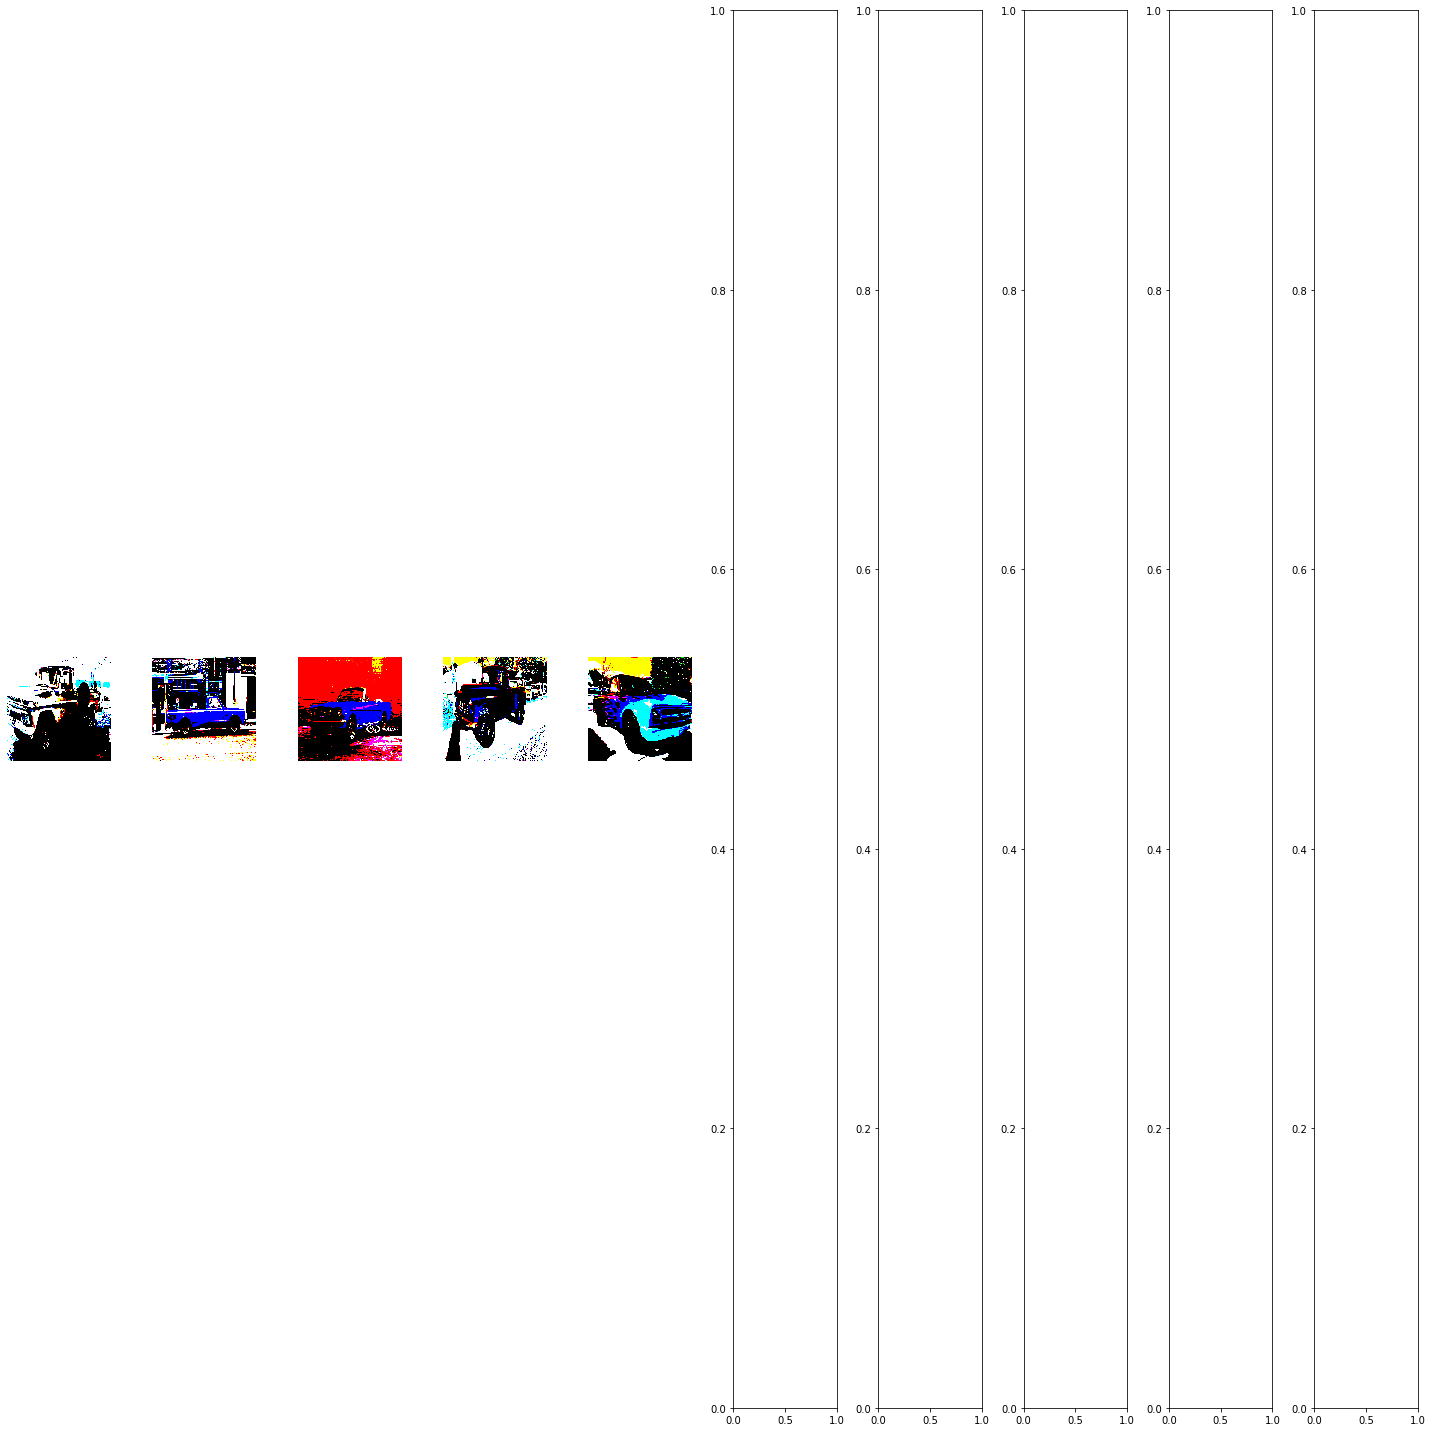

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(5, 5), strides=5),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'),
        Flatten(),
        Dense(units=5, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 123904)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 619525    
Total params: 638,917
Trainable params: 638,917
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
35/35 - 6s - loss: 6.1531e-06 - accuracy: 1.0000 - val_loss: 9.2563 - val_accuracy: 0.4400
Epoch 2/30
35/35 - 6s - loss: 5.6430e-06 - accuracy: 1.0000 - val_loss: 9.2440 - val_accuracy: 0.4400
Epoch 3/30
35/35 - 7s - loss: 5.1179e-06 - accuracy: 1.0000 - val_loss: 9.2326 - val_accuracy: 0.4400
Epoch 4/30
35/35 - 7s - loss: 4.7107e-06 - accuracy: 1.0000 - val_loss: 9.2236 - val_accuracy: 0.4400
Epoch 5/30
35/35 - 7s - loss: 4.4764e-06 - accuracy: 1.0000 - val_loss: 9.2125 - val_accuracy: 0.4400
Epoch 6/30
35/35 - 6s - loss: 4.0507e-06 - accuracy: 1.0000 - val_loss: 9.2044 - val_accuracy: 0.4400
Epoch 7/30
35/35 - 7s - loss: 3.7776e-06 - accuracy: 1.0000 - val_loss: 9.1957 - val_accuracy: 0.4400
Epoch 8/30
35/35 - 7s - loss: 3.5365e-06 - accuracy: 1.0000 - val_loss: 9.1877 - val_accuracy: 0.4400
Epoch 9/30
35/35 - 7s - loss: 3.3158e-06 - accuracy: 1.0000 - val_loss: 9.1799 - val_accuracy: 0.4400
Epoch 10/30
35/35 - 7s - loss: 3.1312e-06 - accuracy: 1.0000 - val_loss: 9.1711 - 